In [40]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np
from keras import layers, models


from tensorflow.keras.datasets import mnist

In [41]:
data = np.load('mnist.npz')


x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


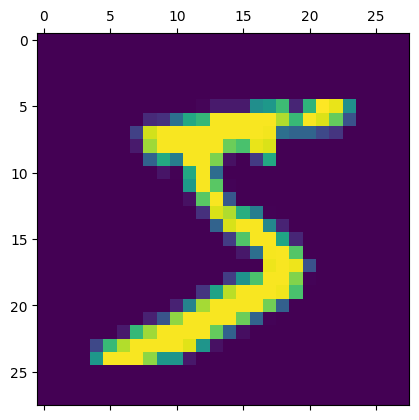

In [42]:
# VISUALIZING DATASET
plt.matshow(x_train[0])

# # Create a figure with a 2x5 grid of subplots
# fig, axes = plt.subplots(2, 5, figsize=(12, 6))
# axes = axes.flatten()

# # Find and plot the first occurrence of each digit from 0 to 9
# for i in range(10):
#     # Find the index of the first image with label 'i'
#     idx = np.where(y_train == i)[0][0]
    
#     # Display the image in the corresponding subplot
#     axes[i].matshow(x_train[idx], cmap='gray')
#     axes[i].set_title(f"Digit: {i}", fontsize=15)
#     axes[i].axis('off') 

# plt.tight_layout()
# plt.show()

In [43]:
# NORMALIZING 
# Faster training: Neural networks converge faster when input value range is small (usually 0–1 or -1–1).
# Numerical stability: Large values can make gradients explode or vanish 
# [ exploding gradient & vanishing gradient ]
# Uniform scale:Helps all features(pixels here) contribute equally to learning
# [0, 255] → [0, 1]
max_pixel_value = x_train.max()
x_train = x_train.astype("float32") / max_pixel_value
x_test = x_test.astype("float32") / max_pixel_value

In [44]:
# NEURAL NETWORK ARCHITECTURE

model = models.Sequential([
    layers.Input(shape=(28, 28)),
    
    layers.Flatten(),          
    # Flatten layer : Converts the 2D input (28x28) into a 1D vector of length 784 (28*28).
    #  Dense layers only accept 1D inputs.
        
        
    # Activation functions like ReLu [ max(0,x) ]Introduce non-linearity, so the network can learn complex patterns
    # Dense = fully connected layer , 256 neurons → the layer will output vector of size 256
    layers.Dense(256, activation='relu'), 
    layers.Dense(128, activation='tanh'), 
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    # Softmax activation: converts  outputs into probabilities that sum to 1
])

In [45]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# SGD : Stochastic Gradient Descent Algorithm: updates weights during training to minimize loss 

# loss=sparse_categorical_crossentropy
    # crossentropy loss function 
    # Loss function for multi-class classification 
    # Measures how far the predicted probabilities are from the true class

# metrics=accuracy
    # model will use this for monitoring performance during training and testing.
    # eg : metrics=['mse'] → for regression (mean squared error)
    # metrics=['precision', 'recall'] → for classification evaluation

In [47]:
# TRAINING THE MODEL WITH EARLY STOPPING

early_stop = keras.callbacks.EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True)
# Monitors validation loss (val_loss)
# Stops training if it doesn’t improve for 3 epochs (patience=3)

# Validation Loss:
# When training a model, validation check performance on unseen data 
# Validation loss is the error (loss) on the validation set 

# Training the model
history = model.fit(
    x_train, y_train, 
    epochs=10,  
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.8934 - loss: 0.3581 - val_accuracy: 0.9644 - val_loss: 0.1158
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.9728 - loss: 0.0909 - val_accuracy: 0.9759 - val_loss: 0.0762
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.9820 - loss: 0.0581 - val_accuracy: 0.9751 - val_loss: 0.0789
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.9862 - loss: 0.0427 - val_accuracy: 0.9775 - val_loss: 0.0774
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.9884 - loss: 0.0344 - val_accuracy: 0.9749 - val_loss: 0.0920


In [48]:

# Train Loss:
    # error on the training data.
    # Lower train loss = model fits the training data well
# Test Loss:
    # error on the testing data.
    # Lower test loss = model fits the test data well

In [49]:
# model.evaluate returns loss and accuracy.
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Loss = {train_loss:.3f}")
print(f"Training Accuracy = {train_acc*100:.2f}%")

Training Loss = 0.046
Training Accuracy = 98.57%


In [50]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss = {test_loss:.3f}")
print(f"Test Accuracy = {test_acc*100:.2f}%")

Test Loss = 0.076
Test Accuracy = 97.59%


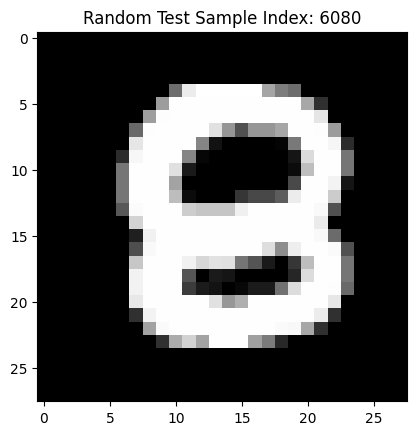

In [51]:
# PREDICTING TEST SAMPLE

# Pick a random index 
n = random.randint(0, len(x_test)-1)

# Display the randomly selected test image
plt.imshow(x_test[n], cmap='gray')  
plt.title(f"Random Test Sample Index: {n}")

plt.show()

In [52]:
# CHECKING THE PREDICTED VALUE
predicted_values = model.predict(x_test, verbose=0)
predicted_class = np.argmax(predicted_values[n]) # consider the max probability of prediction
print(f"Handwritten number in the displayed image (index {n}) is: {predicted_class}")

Handwritten number in the displayed image (index 6080) is: 8


In [53]:
# List all recorded metrics from training
list(history.history.keys())

['accuracy', 'loss', 'val_accuracy', 'val_loss']

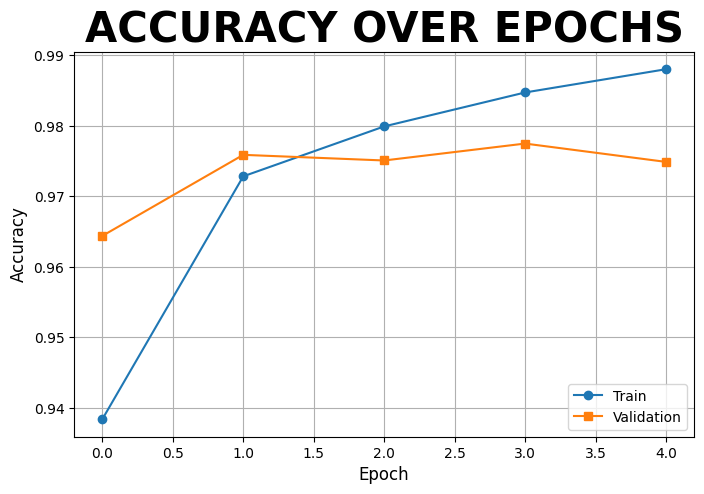

In [54]:
### Validation Accuracy v/s Epochs

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], marker='o')
plt.plot(history.history['val_accuracy'], marker='s')
plt.title('ACCURACY OVER EPOCHS', fontsize=30, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(True)
plt.show()

### Validation loss v/s Epochs

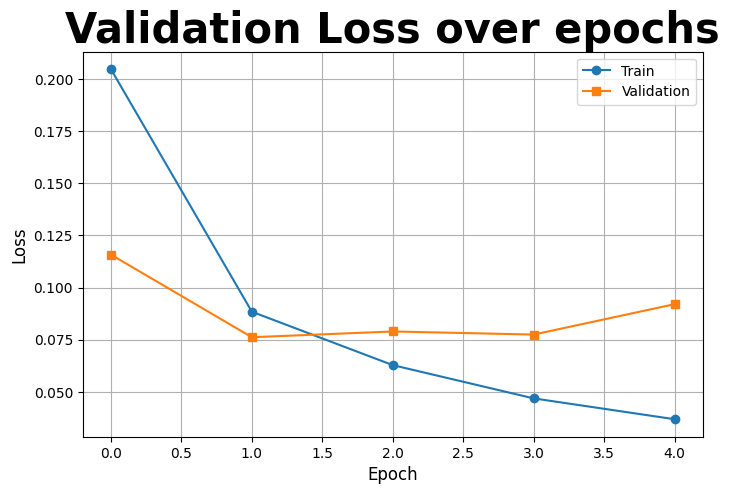

In [55]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], marker='o')
plt.plot(history.history['val_loss'], marker='s')
plt.title('Validation Loss over epochs', fontsize=30, fontweight='bold')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()